**Minicapstone project on Telcom_churn_analysis**

**Introduction to dataset**:
A fictional telco company that provided home phone and internet services to 7043 customers in california in quarter3 of the fiscal year.

**Data Description** :
**1.Customer Id**:unique Id that identifies each customer.
**2.Zip Code**:code of customers primary residence.
**3.Gender**: customers gen:"male","Female".
**4.Senior Citizen**:indicates if customer age is 65 or older:yes or no.
**5.Paperless Biling**:indicates customers chosen paperless biling or not:yes or no
**6.Payment Method**:indicates how the customers paying their bills ;bankwithdrawl,creditcard,mailedcheck.
**7.Monthly Charges**:current totalcharge for all their services from the company.
**8.totalcharges**:customers total charges ,calculated to the end of the quarterspecified above.
**9.Churn Score**:a value from 0-100,that is calculated using predictive tool IBM spssmodeler.higher score,morelikely the customer will churn.



->firstly while begining the process we need to import libraries respective to their work.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

->reading the dataset 

In [2]:
telco=pd.read_excel("//content//Telco_customer_churn.xlsx")
telco

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1.0,89.0,5340.0,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1.0,United States,California,Landers,92285.0,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0.0,45.0,5306.0,NaN
7039,6840-RESVB,1.0,United States,California,Adelanto,92301.0,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0.0,59.0,2140.0,NaN
7040,2234-XADUH,1.0,United States,California,Amboy,92304.0,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0.0,71.0,5560.0,NaN
7041,4801-JZAZL,1.0,United States,California,Angelus Oaks,92305.0,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0.0,59.0,2793.0,NaN


->To know the shape of the dataframe

In [3]:
telco.shape

(7043, 33)

# **Q1**.Datatypes of each column and be sure that python is reading each variable perfectly by these methods
**1.info method**:reads each and every record of the dataframe.
**2.dtype method**:it describes datatypes of each and every column variable.

In [28]:
telco.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   float64
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   float64
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   float64
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
telco.dtypes


CustomerID            object
Count                float64
Country               object
State                 object
City                  object
Zip Code             float64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months        float64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value          float64
Churn Score          float64
CLTV                 float64
Churn Reason          object
dtype: object

**Datatypes**:

**1.Customer_id**=datatype is object its a mix of both character and numbers or stringdatatype.
**2.Count**=variable is numerical discrete datatype
**3.Country**= variable is a string datatype.
**4.State**=a string datatype.
**5.city**=a string datatype.
**6.zipcode**=a numerical datatype with continuous ,expressed in float
**7.lattitude**=a numerical datatype with contionus-float
**8.longitude**=a numerical datatype with continuos-float
**9.Gender**= a categorical datatype
**10.senior citizen**=a categorical datatype.
**11.partners**=a categorical datatype.
**12.monthlycharges**=anumerical datatype with float
**13.total charges**=a numerical datatype with float



But in the given dataframe there some wrong datatypes assigned to the variables.mistakes are incase of numericals,noticed that totalcharges could be float datatype and for  gender, senior citizen should be categorical.

#**Q2**.please apply appropriate statistical measures using python based on datatypes

In [29]:
telco.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


#**Q10**.create appropriate plot between totalcharges and monthlycharges

for that totalcharges changed to numerical.floatdatatype becoz previously it was assigned as objected which can expected to be numerical. 

In [7]:
telco["Total Charges"]= pd.to_numeric(telco["Total Charges"],errors='coerce')
telco["Total Charges"].dtypes

dtype('float64')

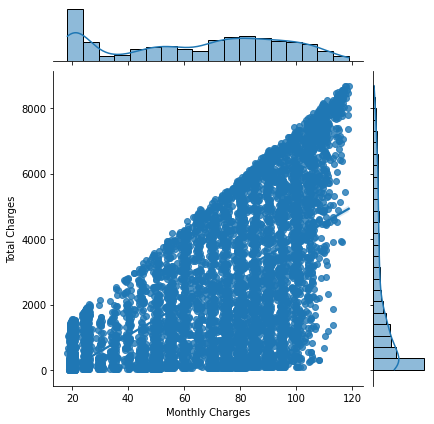

In [8]:
#relation between total charges and monthly charges.
sns.jointplot(x="Monthly Charges",y="Total Charges",data=telco,kind='reg')

mean while with the increase of monthlycharges there is rise total charges.both are directly proportional to eachother.usage of joint plot explains the variables distribution and relation.


#**Q4**.examine the distribution of tenure months by ploting graph.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


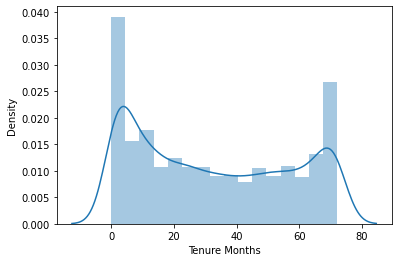

In [9]:
#distplot helps us to check the distribution of columns feature
sns.distplot(telco["Tenure Months"])

here tenure months got positively skewed towards rightside direction.

In [10]:
telco["Tenure Months"].describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64

#Q3.% of females and senior citizen in dataset.

In [11]:
telco["Gender"].value_counts()*100/len(telco)

Male      50.47565
Female    49.52435
Name: Gender, dtype: float64

In [12]:
telco["Senior Citizen"].value_counts()*100/len(telco)

No     83.785319
Yes    16.214681
Name: Senior Citizen, dtype: float64

%of female are :49% 


%of seniorcitizen:16%

```
# This is formatted as code
```



#Q9.create an appropriate plot to check the count of payment methods.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


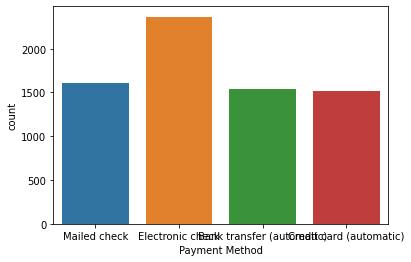

In [14]:
sns.countplot("Payment Method",data=telco)

#Q8.find payment methods with highest churn and lowest churn.

In [16]:
tel=telco.groupby(["Churn Score","Payment Method"]).size().reset_index()

In [17]:
tel

,Churn Score,Payment Method,0
0,5.0,Credit card (automatic),1
1,7.0,Electronic check,2
2,8.0,Bank transfer (automatic),1
3,8.0,Credit card (automatic),1
4,9.0,Bank transfer (automatic),1
...,...,...,...
326,99.0,Mailed check,10
327,100.0,Bank transfer (automatic),8
328,100.0,Credit card (automatic),5
329,100.0,Electronic check,28


In [18]:
#maximum churnscore with paymentmethod
tel.sort_values('Churn Score',ascending=False).head()

,Churn Score,Payment Method,0
330,100.0,Mailed check,9
329,100.0,Electronic check,28
328,100.0,Credit card (automatic),5
327,100.0,Bank transfer (automatic),8
326,99.0,Mailed check,10


In [19]:
#minimum churn score with payment method
tel.sort_values("Churn Score")

,Churn Score,Payment Method,0
0,5.0,Credit card (automatic),1
1,7.0,Electronic check,2
2,8.0,Bank transfer (automatic),1
3,8.0,Credit card (automatic),1
4,9.0,Bank transfer (automatic),1
...,...,...,...
324,99.0,Credit card (automatic),8
328,100.0,Credit card (automatic),5
329,100.0,Electronic check,28
327,100.0,Bank transfer (automatic),8


mailedcheck has highest churnscore with 100;credit card (automatic)has lowest churnscore with 5.

#Q8.find minimum totalchargesfor losangelescity.also find zipcode with maximum totalcharges.

In [20]:
telm=telco.groupby(["Total Charges","City"]).size().reset_index()

In [21]:
telm.sort_values("Total Charges")

,Total Charges,City,0
0,18.80,Los Angeles,1
1,18.85,Arnold,1
2,18.85,Twain,1
3,18.90,Sierraville,1
4,19.00,Anaheim,1
...,...,...,...
7024,8564.75,Irvine,1
7025,8594.40,Cabazon,1
7026,8670.10,Long Beach,1
7027,8672.45,Middletown,1


here the city named los angeles got lowest totalcharges with value 18.80

In [22]:
teli=telco.groupby(["Total Charges","Zip Code"]).size().reset_index()

In [23]:
teli.sort_values("Total Charges")

,Total Charges,Zip Code,0
0,18.80,90003.0,1
1,18.85,95223.0,1
2,18.85,95984.0,1
3,18.90,96126.0,1
4,19.00,92808.0,1
...,...,...,...
7027,8564.75,92614.0,1
7028,8594.40,92230.0,1
7029,8670.10,90822.0,1
7030,8672.45,95461.0,1


zipcode with 95519 has max totalcharges and 90003 has lowest totalcharges

#Q5.convert all binary columns into 0 and1 using appropriate programing constructs.

In [30]:
#by using get_dummies method changing categorical values into binary 0 and 1. 
telco_dummies=pd.get_dummies(telco)

In [31]:
telco_dummies

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,...,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,1.0,90003.0,33.964131,-118.272783,2.0,53.85,108.15,1.0,86.0,3239.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,90005.0,34.059281,-118.307420,2.0,70.70,151.65,1.0,67.0,2701.0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,90006.0,34.048013,-118.293953,8.0,99.65,820.50,1.0,86.0,5372.0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,90010.0,34.062125,-118.315709,28.0,104.80,3046.05,1.0,84.0,5003.0,...,0,0,0,1,0,0,0,0,0,0
4,1.0,90015.0,34.039224,-118.266293,49.0,103.70,5036.30,1.0,89.0,5340.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,92285.0,34.341737,-116.539416,72.0,21.15,1419.40,0.0,45.0,5306.0,...,0,0,0,0,0,0,0,0,0,0
7039,1.0,92301.0,34.667815,-117.536183,24.0,84.80,1990.50,0.0,59.0,2140.0,...,0,0,0,0,0,0,0,0,0,0
7040,1.0,92304.0,34.559882,-115.637164,72.0,103.20,7362.90,0.0,71.0,5560.0,...,0,0,0,0,0,0,0,0,0,0
7041,1.0,92305.0,34.167800,-116.864330,11.0,29.60,346.45,0.0,59.0,2793.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
telco_dummies.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9901 columns):
 #     Column                                                  Dtype  
---    ------                                                  -----  
 0     Count                                                   float64
 1     Zip Code                                                float64
 2     Latitude                                                float64
 3     Longitude                                               float64
 4     Tenure Months                                           float64
 5     Monthly Charges                                         float64
 6     Total Charges                                           float64
 7     Churn Value                                             float64
 8     Churn Score                                             float64
 9     CLTV                                                    float64
 10    CustomerID_0002-ORFBO           

#Q6.examine the distribution b/n monthlycharges with gender using boxplot.

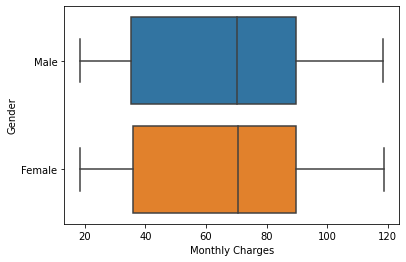

In [27]:
sns.boxplot(x="Monthly Charges",y="Gender",data=telco)